#Neural Network Model Testing and Practice

##Intro

This is a testing ground for any scientific experiments pipeline containing several modules. 
Planned to be tested on any generic sensor data with many features. The features in the dataframe are simply random common variables found that can be found in various experiments.
Due to unknown dependancies between features as well as correlations we may not be aware of yet, it would be prudent to generate a random dataset and set up a skeleton framework that manipulates the data and runs it through a ML model. These simulations will form the basis of our understanding of how a real pipeline in an experiment will look like as well as serve as a convenient tester should we ever get a hold of real sensor data. 

**NOTE** *This pipeline uses randomly generated data so metrics and accuracies will have no applicable meaning. This notebook is simply to test and set up several models that can be readily tested on sensor data when it does arrive for more thorough optimization.*

In [20]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

'''
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
    

!pip install -U tensorboardcolab
from tensorboardcolab import *
tbc=TensorBoardColab()
'''


'\n!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip\n!unzip ngrok-stable-linux-amd64.zip\nLOG_DIR = \'./log\'\nget_ipython().system_raw(\n    \'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &\'\n    .format(LOG_DIR)\n)\nget_ipython().system_raw(\'./ngrok http 6006 &\')\n! curl -s http://localhost:4040/api/tunnels | python3 -c     "import sys, json; print(json.load(sys.stdin)[\'tunnels\'][0][\'public_url\'])"\n    \n\n!pip install -U tensorboardcolab\nfrom tensorboardcolab import *\ntbc=TensorBoardColab()\n'

The initial exercise is a supervised learning regression problem since we are  assuming to predict a continuous value. All features are numeric.
Given an initial input of sensor data and its output, our model will be trained and be able to predict the biomass/exit FR of any given instance of these observables.

##Data Cleaning & Preparation

In [13]:
var = ['Velocity (m/s)', 'Voltage (V)', 'Length (m)', 'Width (m)', 'Resistance (Ohm)' , 'Mass (g)' , 'Acidity', 'temperature (C)', 'pH', 'salinity(mg/L)', 'Distance from the Sun (km)' , 'Elevation (m)' , 'Kinetic Energy (J)']
#var = ['A', 'B', 'C', 'D']
dict_vars = {}
for i in var:
  dict_vars[i] = random.sample(range(0, 200000), 50)
df = pd.DataFrame(dict_vars)
df

,Acidity,Distance from the Sun (km),Elevation (m),Kinetic Energy (J),Length (m),Mass (g),Resistance (Ohm),Velocity (m/s),Voltage (V),Width (m),pH,salinity(mg/L),temperature (C)
0,182726,166755,16682,40318,119756,111460,177631,182118,41765,101153,176419,125010,98161
1,144437,147121,55197,101459,157134,32592,36556,5645,118608,166331,47748,29216,132077
2,124372,148071,159578,85027,111973,149579,12996,142412,184089,97998,77633,91457,106344
3,88674,192767,4598,179066,175341,144758,169451,114543,86592,113167,86719,10461,183428
4,250,175016,182256,139699,21669,137945,106548,145658,188143,155392,100648,65287,84016
5,9409,147014,22783,71234,129089,171369,104269,21837,38991,24897,23467,111073,19423
6,158704,112724,53206,71298,101994,89104,188151,78314,153510,175676,96185,75532,40344
7,149432,72575,12552,39586,170719,159211,66779,29905,127811,189575,183319,148232,163813
8,124882,17143,120915,133545,96803,67216,29472,82054,52822,187574,182436,107350,96704
9,34788,169766,55781,166721,67898,142531,139582,42931,194648,54563,160633,146914,79453


In [0]:
df.keys()
def norm(x):
  '''
  Normalizes our training values as several features have different ranges and scalings. It is good practice anyway and helps the model along.
  
  '''
  return (x - train_stats['mean']) / train_stats['std']
#normalized_train_data = norm(train_df)
#normalized_test_data = norm(test_df)

In [0]:
train_df = df.sample(frac=0.8,random_state=0) 
test_df = df.drop(train_df.index)

x_train = train_df.drop(['Acidity'], axis=1)
y_train = train_df.pop('Acidity')

x_test = test_df.drop(['Acidity'], axis=1)
y_test = test_df.pop('Acidity')

Seen above this is our test dataset that we will be playing with. As mentioned before these values are purely random placeholders (a pH level of 9828 is literally impossible) and their real-life implications are to be ignored.
Also above are our training and test datasets with a 80/20 split. Below, we take a quick peek at the general statistics of our training data as well as graph its form. Useful for a pre-training understanding of our data. As the data is random, these stats/graphs don't mean anything at the moment.

We separate a random feature from the data set as this is what we want our model to predict.

In [15]:
train_stats = train_df.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Distance from the Sun (km),40.0,111370.275,54746.561136,16750.0,58261.50,123114.5,160368.50,199771.0
Elevation (m),40.0,115128.775,55051.439404,9575.0,60167.25,135362.5,161976.00,199322.0
Kinetic Energy,40.0,101739.575,55881.987454,4946.0,57427.75,112452.0,140957.50,193586.0
Length (m),40.0,96738.425,52240.843649,6238.0,54421.75,94913.0,128000.25,184800.0
Mass (g),40.0,95191.075,54101.993656,5108.0,58574.00,98939.0,127801.25,195821.0
Resistance (Ohm),40.0,100180.500,64246.135517,9329.0,37968.50,93558.5,163637.50,199026.0
Velocity (m/s),40.0,98461.100,55471.712898,11859.0,56924.00,91020.5,140729.50,189271.0
Voltage (V),40.0,105987.575,51135.875158,12295.0,68635.50,118171.5,145738.25,185297.0
Width (m),40.0,106353.375,59943.393855,14482.0,58415.00,93587.0,160965.75,199867.0
pH,40.0,100375.100,53802.570448,4593.0,51569.75,92886.0,142966.25,199155.0


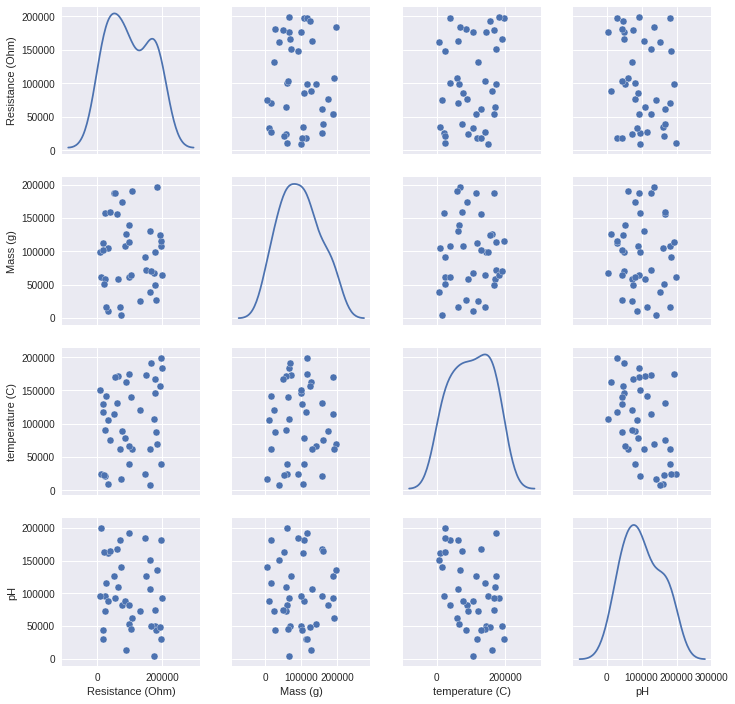

In [17]:
sns.pairplot(train_df[['Resistance (Ohm)', 'Mass (g)', 'temperature (C)', 'pH']], diag_kind="kde")

##The ML Model

To start off we'll use the simplest  linear Neural Network model with the Sequential builder.  Using the summary in-built function, we can take a closer look at it's details and layers.
Our loss function is mean squared error and activation function is Tensorflows own ReLU.

In [0]:
batch_size = 128
num_classes = 10
epochs = 12
model = keras.Sequential([
  layers.Dense(64, activation=tf.nn.relu, input_shape=[len(x_train.keys())]), #first layer that takes in the shape of our training dataframe
  layers.Dense(64, activation=tf.nn.relu),
  layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=batch_size,
                         write_images=True)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tbCallBack])
score = model.evaluate(x_test, y_test, verbose=0)

In [21]:
def build_predictor_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_df.keys())]), #first layer that takes in the shape of our training dataframe
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model = build_predictor_model()
#model.summary()
train_the_model = model.fit(x_train, y_train, epochs=100, validation_split = 0.2)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 32 samples, validate on 8 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
32/32 [==============================] - 0s 11ms/sample - loss: 5681642496.0000 - mean_absolute_error: 66612.8828 - mean_squared_error: 5681642496.0000 - val_loss: 4181263104.0000 - val_mean_absolute_error: 58677.4023 - val_mean_squared_error: 4181263104.0000
Epoch 2/100
32/32 [==============================] - 0s 176us/sample - loss: 3273769472.0000 - mean_absolute_error: 47649.0391 - mean_squared_error: 3273769472.0000 - val_loss: 3417652224.0000 - val_mean_absolute_error: 52790.4961 - val_mean_squared_error: 3417652224.0000
Epoch 3/100
32/32 [==============================] - 0s 280us/sample - loss: 2948626432.0000 - mean_absolute_error: 44121.8867 - mean_squared_error: 2948626432.0000 - val_loss: 3436259328.0000 - val_mean_absolute_error: 52856.0156 - val_mean_sq

We can run a quick sample batch just to make sure it is running without errors and it is giving us something we expect in the shape that we want.

In [23]:
sample_batch = test_df[:10]
sample_test_result = model.predict(sample_batch)
sample_test_result

array([[ 54061.566],
       [162946.25 ],
       [109474.1  ],
       [167439.27 ],
       [ 76361.75 ],
       [164098.89 ],
       [118161.81 ],
       [137021.66 ],
       [ 92767.23 ],
       [113498.734]], dtype=float32)

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions = model.predict(x_test)

Test loss: 3683682816.0
Test accuracy: 48723.773


In [25]:
print(predictions[0])
print(x_test.iloc[0,:])

[54061.566]
Distance from the Sun (km)     99228
Elevation (m)                  22410
Kinetic Energy                  2562
Length (m)                     84766
Mass (g)                       91571
Resistance (Ohm)               24291
Velocity (m/s)                190337
Voltage (V)                   116779
Width (m)                      58293
pH                            111219
salinity(mg/L)                165967
temperature (C)               161930
Name: 0, dtype: int64


Our training gave us alot of results. But its a bit messy. We can check it's history in a dataframe for better examination. 
We create the epoch column so we know which result matches which instance of the training cycle.

In [26]:
hist = pd.DataFrame(train_the_model.history)
hist['epoch'] = train_the_model.epoch
hist.tail()
hist


,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,5.681642e+09,66612.882812,5.681642e+09,4.181263e+09,58677.402344,4.181263e+09,0
1,3.273769e+09,47649.039062,3.273769e+09,3.417652e+09,52790.496094,3.417652e+09,1
2,2.948626e+09,44121.886719,2.948626e+09,3.436259e+09,52856.015625,3.436259e+09,2
3,2.745474e+09,42380.812500,2.745474e+09,3.352313e+09,51845.222656,3.352313e+09,3
4,2.590843e+09,41048.835938,2.590843e+09,3.444770e+09,52486.406250,3.444770e+09,4
5,2.462884e+09,40263.609375,2.462884e+09,3.447213e+09,52213.800781,3.447213e+09,5
6,2.351372e+09,39260.933594,2.351372e+09,3.536370e+09,52870.765625,3.536370e+09,6
7,2.250626e+09,38543.660156,2.250626e+09,3.534825e+09,52410.351562,3.534825e+09,7
8,2.158284e+09,37553.968750,2.158284e+09,3.687065e+09,53508.976562,3.687065e+09,8
9,2.074555e+09,36959.375000,2.074555e+09,3.609927e+09,52205.671875,3.609927e+09,9


(0, 10000000000000000)

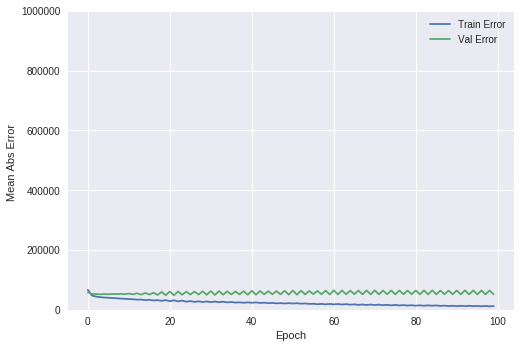

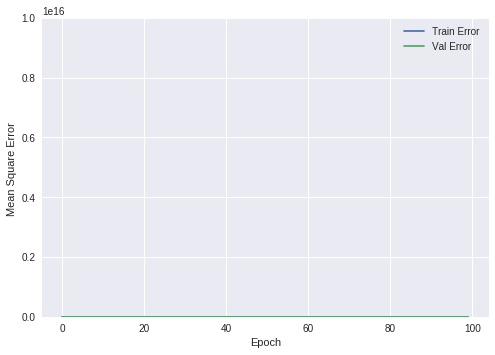

In [28]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error ')
plt.plot(hist['epoch'], hist['mean_absolute_error'],
         label='Train Error')
plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
         label = 'Val Error')
plt.legend()
plt.ylim([0,1000000])

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error ')
plt.plot(hist['epoch'], hist['mean_squared_error'],
         label='Train Error')
plt.plot(hist['epoch'], hist['val_mean_squared_error'],
         label = 'Val Error')
plt.legend()
plt.ylim([0,10000000000000000])

The last cell is set up so that we can graph our mean squared error and mean absolute error to evaluate our model's perfomance and help us make decisions for optimization after. There no plots currently due our random numbers not producing anything of value. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib notebook
title = 'Mean Absolute Error'
d = hist['mean_absolute_error']

x = np.array(d.index)
y = np.array(d)

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(10))
ax.set_ylim(0, 1)


def update(data):
    line.set_ydata(data)
    return line,

def data_gen():
    while True:
        yield np.random.rand(10)

ani = animation.FuncAnimation(fig, update, data_gen, interval=100)
rc('animation', html='jshtml')
ani

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>